# Pore sizing from IV
### Uses the following equation to size pores where access resistance is significant

$$ G = \sigma\left[\frac{4t}{\pi d^{2}}+\frac{1}{d}\right]^{-1} $$



## Imports

In [1]:
# Python standard library
import csv

# Scientific computing
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

## Open data

In [6]:
# Insert the file path to the IV curve (taken from the nanopore wizard software)
iv_file_path = '../data/S4/S4_SiN_pH10_8V_1MKCla.txt'

In [7]:
def LoadIVNanoporeWizard(file_path):
    with open(file_path, 'r') as file_handle:
        file_reader = csv.reader(file_handle, delimiter = '\t')
        
        # Skip header
        header_rows = 3
        for i in range(header_rows):
            file_reader.next()
            
            
        # Load in data
        voltages = []
        currents = []
        for row in file_reader:
            voltages.append(float(row[-2]))
            currents.append(float(row[-1]))
            
    return voltages, currents
        
def FitConductance(voltages, currents, side = 'both'):
    '''
    * 'side' argument is whether you want to use negative voltage conductance ('left'),\
       positive voltage conductance ('right'), or the entire sweep ('both')
    '''
    
    
    N_points = len(voltages)
    if side == 'left':
        fit = np.polyfit(voltages[:N_points/2], currents[:N_points/2], 1)
        
    elif side == 'right':
        fit = np.polyfit(voltages[N_points/2:], currents[N_points/2:], 1)
        
    elif side == 'both':
        fit = np.polyfit(voltages, currents, 1)
        
    return fit

In [12]:
voltages, currents = LoadIVNanoporeWizard(iv_file_path)

[  5.85914848e-08   8.16124667e-09]


## Get conductance

In [43]:
fit = FitConductance(voltages, currents, side = 'right')

fit_currents = [-1,1]
fit_voltages = [fit[0]*fit_current + fit[1] for fit_current in fit_currents]

G = fit[0]
print 'conductance = ', G

conductance =  1.47246090909e-08


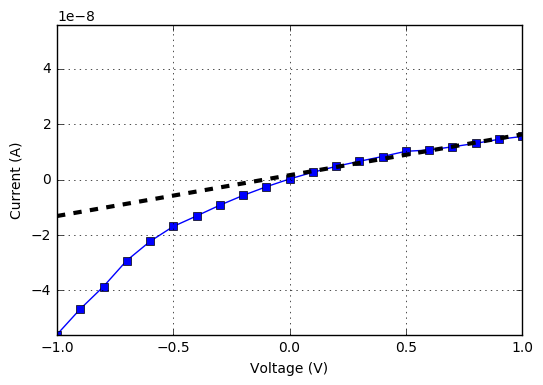

In [44]:
plt.plot(voltages, currents, marker = 's')
plt.plot(fit_currents, fit_voltages, lw = 3, ls = '--', c = 'k')

plt.ylim(-np.max(np.abs(currents)), np.max(np.abs(currents)))

plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.grid()


plt.show()

## Solve for diameter
- Solve quadratic equation for diameter

$$ G = \sigma\left[\frac{4t}{\pi d^{2}}+\frac{1}{d}\right]^{-1} $$

$$ d = \frac{1\pm\sqrt{1+\frac{16\sigma t}{\pi G}}}{2\frac{\sigma}{G}}    $$

In [45]:
nm = 10**(-9.)
t = 10*nm
sigma = 10.


include_access = True
def conductance(d):
    return G-sigma * ((4*t)/(np.pi*d**2.) + include_access * 1./d)**(-1.)

In [46]:
print 'Diameter of pore:', (1+np.sqrt(1-4*sigma/G*(-4*t/np.pi)))/(2*sigma/G)

Diameter of pore: 5.1282675511e-09
